In [1]:
# 구글드라이브에서 데이터를 사용하기 위해서 Mount를 하는 코드입니다.
# 구글 계정으로 로그인하여, 구글드라이브에 있는 실습용 데이터를 사용할 수 있게 인증하는 방식입니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 실습용 데이터셋이 있는 경로입니다. (*** 구글드라이브 내 경로 ***)
# 본인의 경로에 맞게 수정해서 사용하세요. (자세한 사용법은 함께 제공되는 튜토리얼 영상을 확인하세요)
base_path = "/content/drive/MyDrive/Colab Notebooks/[초격차] 데이터 분석/input"

In [3]:
# 정형 데이터를 불러오고 조작하기 위해 Pandas 라이브러리를 사용합니다.
import pandas as pd
# 지정한 경로에 있는 데이터를 불러옵니다. csv 파일이냐 xlsx 파일이냐에 따라 사용하는 함수가 다릅니다.
data = pd.read_excel(base_path + "/#10_페이스북 광고비 지출 데이터.xlsx")
data

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2020-03-20,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 1,Image,Girl,device,55-64,1.430000,18,1,NaN
1,2020-03-20,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 1,Image,Girl,device,45-54,24.350000,228,11,3.0
2,2020-03-20,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 1,Image,Girl,device,35-44,89.060000,764,7,1.0
3,2020-03-20,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 1,Image,Girl,device,25-34,255.620000,1895,30,11.0
4,2020-03-20,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 1,Image,Click,device,55-64,6.409971,68,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Image,Click,device,25-34,117.130000,638,36,21.0
1729,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,55-64,0.450000,3,0,NaN
1730,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,45-54,3.800000,32,1,NaN
1731,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,35-44,7.660000,71,1,1.0


In [4]:
# 불러온 데이터셋에 대한 전반적인 정보를 확인하는 함수입니다.
# row수, column수, 결측치 수, column별 data type을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1733 non-null   datetime64[ns]
 1   product               1733 non-null   object        
 2   phase                 1733 non-null   object        
 3   campaign_platform     1733 non-null   object        
 4   campaign_type         1733 non-null   object        
 5   communication_medium  1733 non-null   object        
 6   subchannel            1733 non-null   object        
 7   audience_type         1733 non-null   object        
 8   creative_type         1733 non-null   object        
 9   creative_name         1733 non-null   object        
 10  device                1733 non-null   object        
 11  age                   1733 non-null   object        
 12  spends                1733 non-null   float64       
 13  impressions       

In [5]:
# 데이터의 통계량을 확인합니다.
data.describe()

,spends,impressions,clicks,link_clicks
count,1733.000000,1733.000000,1733.000000,1187.000000
mean,325.513855,2348.881708,44.759954,29.781803
std,1101.859732,7296.050662,125.557211,62.914343
min,0.000000,1.000000,0.000000,1.000000
25%,2.690000,30.000000,1.000000,2.000000
50%,18.770000,165.000000,4.000000,7.000000
75%,151.590000,1330.000000,28.000000,26.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [6]:
# plotting을 위해 사용하는 parameter들을 사용자로부터 입력받습니다.

# x는 violinplot의 x축에 표현되는 feature를 의미합니다. data에 존재하는 column중에 x축에 표시하고 싶은 column의 이름을 입력하세요.
# x축 정보는 violinplot이 나뉘는 기준입니다.
x = input("violinplot의 x축이 되는 column을 입력하세요 : ")
# y는 violinplot의 y축에 표현되는 feature를 의미합니다. data에 존재하는 column중에 y축에 표시하고 싶은 column의 이름을 입력하세요.
# y축 정보는 violinplot에 들어가는 실제값입니다.
y = input("violinplot의 y축이 되는 column을 입력하세요 : ")
# hue는 violinplot에서 각 plot마다 색을 다르게 주는 기준이 되는 feature를 의미합니다. data에 존재하는 column중에 hue에 표시하고 싶은 column의 이름을 입력하세요.
# hue는 plot에서 색 정보를 통해서 구분되어 표현되는 column을 의미합니다.
hue = input("violinplot의 색상 구분의 기준이 되는 column을 입력하세요 : ")

violinplot의 x축이 되는 column을 입력하세요 : audience_type
violinplot의 y축이 되는 column을 입력하세요 : clicks
violinplot의 색상 구분의 기준이 되는 column을 입력하세요 : creative_name


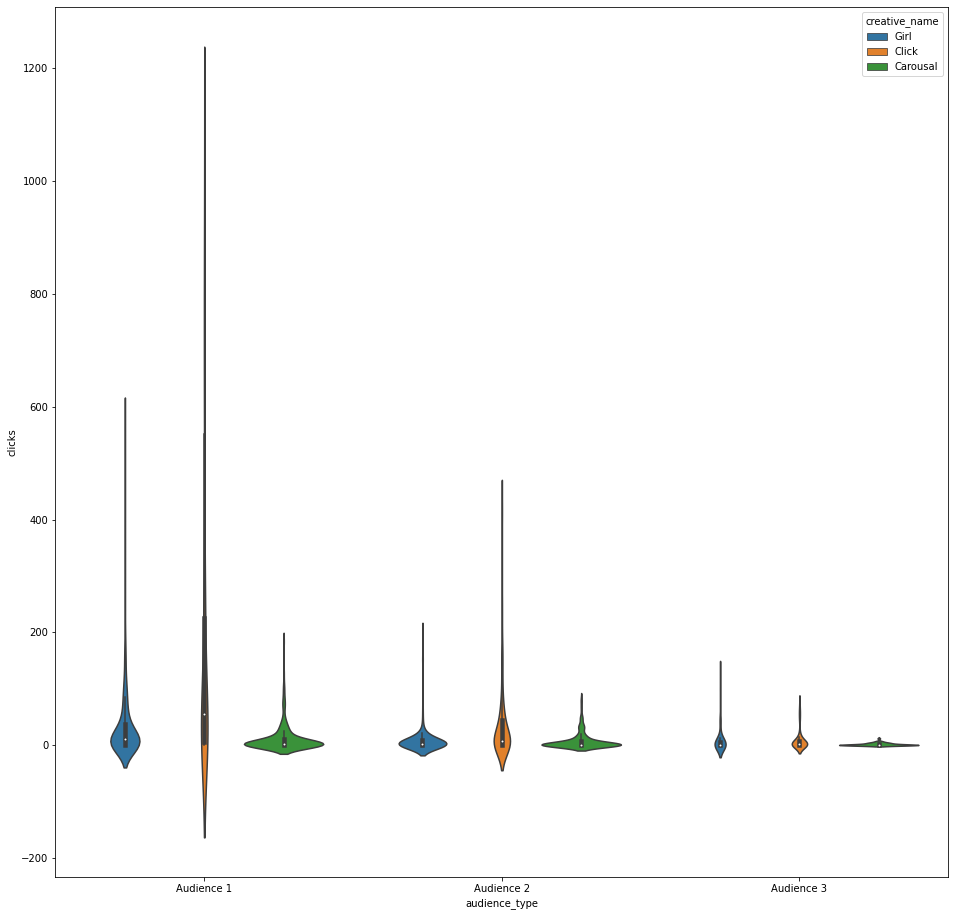

In [7]:
# 그래프를 출력할 때 필요한 설정을 해주는 matplotlib.pyplot을 불러옵니다.
import matplotlib.pyplot as plt
# violinplot을 그려주는 라이브러리인 seaborn을 불러옵니다.
import seaborn as sns

# 출력할 plot의 크기를 정해줍니다. 16 x 16의 크기로 지정합니다.
plt.figure(figsize=(16, 16))
# 위에서 입력받은 x, y, hue를 기준으로 violinplot을 그립니다.
sns.violinplot(data=data, x=x, y=y, hue=hue)
# plot을 출력합니다.
plt.show()